<a href="https://colab.research.google.com/github/alpha597/ML_LAB_ASSIGNMENTS/blob/main/ML_lab_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1 Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv('/content/sample_data/iris.data')

iris_data = iris_data.sample(frac=1).reset_index(drop=True)
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.6,3.1,1.5,0.2,Iris-setosa
1,4.4,2.9,1.4,0.2,Iris-setosa
2,5.1,3.7,1.5,0.4,Iris-setosa
3,6.5,3.2,5.1,2.0,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

temp = iris_data['Iris-setosa']
X = iris_data.drop('Iris-setosa', axis=1)
y = temp.copy()
for i in range(len(y)):
  if temp[i] == 'Iris-versicolor':
    y[i] = 0
  elif temp[i] == 'Iris-setosa':
    y[i] = 1
  else:
    y[i] = 2
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y.head()


,Iris-setosa
0,1
1,1
2,1
3,2
4,2


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_test_copy = X_test.copy()
X_train_copy = X_train.copy()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(y_pred)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      1.00      1.00         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

[[11  0  1]
 [ 0  9  0]
 [ 1  0  8]]
[1 0 0 1 2 2 0 1 0 1 1 2 0 2 0 0 2 0 0 2 0 1 2 0 1 1 2 1 0 2]


In [5]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_test_copy_bn = X_test.copy()
X_train_copy_bn = X_train.copy()
y_train_bn = y_train.copy()
y_test_bn = y_test.copy()
bnb = BernoulliNB(alpha=1.0, force_alpha=False, fit_prior=False, binarize=0.0)
bnb.fit(X_train_copy_bn, y_train_bn)
y_pred = bnb.predict(X_test_copy_bn)
print(classification_report(y_test_bn, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         9
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

[[ 0  0 12]
 [ 0  0  9]
 [ 0  0  9]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
from sklearn.naive_bayes import MultinomialNB

X_test_copy_mn = X_test.copy()
X_train_copy_mn = X_train.copy()
y_train_mn = y_train.copy()
y_test_mn = y_test.copy()
mnb = MultinomialNB(alpha=1.0, fit_prior=False)
mnb.fit(X_train_copy_mn, y_train_mn)
y_pred = mnb.predict(X_test_copy_mn)
print(classification_report(y_test_mn, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       1.00      1.00      1.00         9
           2       0.86      0.67      0.75         9

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.87        30
weighted avg       0.87      0.87      0.86        30

[[11  0  1]
 [ 0  9  0]
 [ 3  0  6]]


In [7]:
from sklearn.naive_bayes import CategoricalNB
X_test_copy_cn = X_test.copy()
X_train_copy_cn = X_train.copy()
y_train_cn = y_train.copy()
y_test_cn = y_test.copy()
cn = CategoricalNB(alpha=1.0, fit_prior=False)
cn.fit(X_train_copy_cn, y_train_cn)
y_pred = cn.predict(X_test_copy_cn)
print(classification_report(y_test_cn, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         9

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.90        30
weighted avg       0.92      0.90      0.90        30

[[12  0  0]
 [ 0  9  0]
 [ 3  0  6]]


In [8]:
from sklearn.tree import DecisionTreeClassifier
X_test_copy_dt = X_test.copy()
X_train_copy_dt = X_train.copy()
y_train_dt = y_train.copy()
y_test_dt = y_test.copy()

In [9]:
dtmodel = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtmodel.fit(X_train_copy_dt, y_train_dt)
y_pred = dtmodel.predict(X_test_copy_dt)
print(classification_report(y_test_dt, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       1.00      1.00      1.00         9
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [10]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  2],
       [ 0,  9,  0],
       [ 1,  0,  8]])

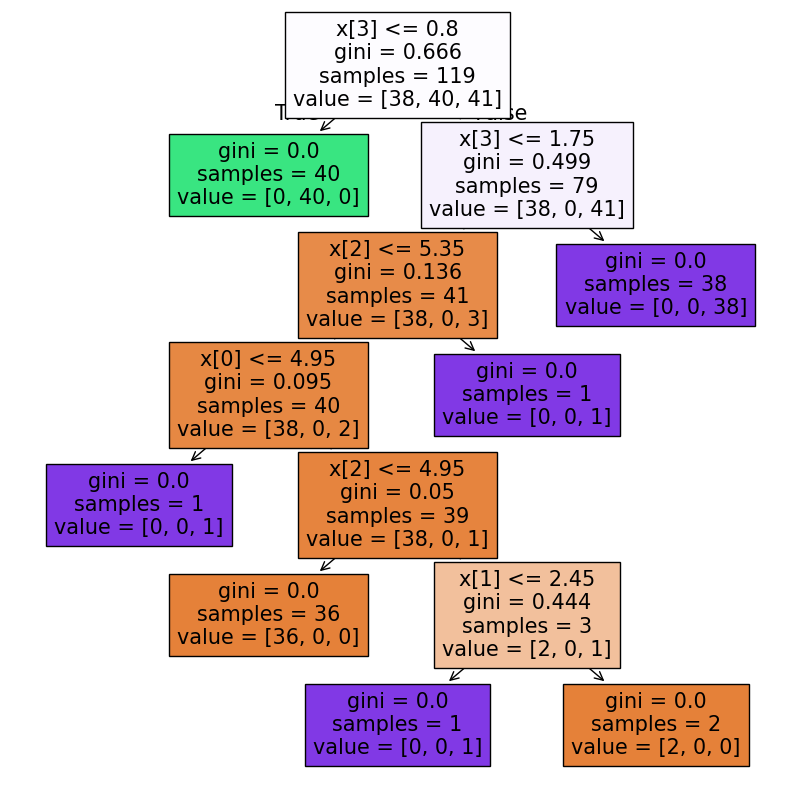

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(dtmodel, filled=True)
plt.show()